**Description :** so in this experiment actually i want to apply the Principal Component Analysis in the Tennesse Eastman Dataset

In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = './data/'

train_normal_path = 'TEP_FaultFree_Training.RData'

train_normal_complete = pyreadr.read_r(path + train_normal_path)['fault_free_training']

In [3]:
train_normal_complete.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [29]:
train_normal_complete.shape

(250000, 55)

In [4]:
# drop the first column index and only in the simulation 1
df_train = train_normal_complete[train_normal_complete.simulationRun==1].iloc[:,3:]

In [5]:
df_train.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [60]:
# df_train.info()

## Scale the Data

In [7]:
# scaling the data
from sklearn.preprocessing import StandardScaler

x = StandardScaler()

In [8]:
x = x.fit_transform(df_train)

In [9]:
# put the data into pandas dataframe
x = pd.DataFrame(x, columns=df_train.columns)

In [10]:
x.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,-0.007459,0.343859,0.502126,-1.431359,-0.084087,0.278542,-0.009557,-0.292773,0.510938,0.098431,...,-0.488936,0.000962,1.050090,-0.051818,-0.122736,1.319983,0.471559,-0.720571,0.279630,0.250397
1,0.017875,-0.103316,1.215653,1.035368,-0.866377,1.068875,0.107804,-0.032734,0.510938,-0.071378,...,-1.237481,-0.024152,-1.590601,-0.185906,0.049624,0.089123,-1.227605,-0.760505,0.460598,-0.634866
2,-0.007459,-0.075750,-0.821517,1.240929,-0.149278,-1.229449,0.308995,-0.467397,1.023929,-0.120262,...,0.901543,0.004238,0.029987,0.562959,0.098256,0.231510,0.029317,-0.740779,0.173916,1.722067
3,-0.029225,-0.045122,0.065220,1.685042,-0.694087,-1.261244,0.476653,0.392438,-0.515042,-0.128838,...,-0.030736,0.025713,-1.110695,0.302375,0.107554,-0.068286,0.381272,-0.649365,0.969458,-0.002535
4,1.550795,0.497001,-0.325151,-0.085064,-0.084087,1.404994,0.124570,0.703725,-0.515042,-0.918704,...,-0.684011,1.507821,-0.418568,-0.532509,-0.688446,1.199804,0.424744,-0.799476,0.725778,0.260288


## Make PCA Model

In [11]:
from sklearn.decomposition import PCA

pca10 = PCA(n_components=10)

In [12]:
pcm10 = pca10.fit_transform(x)

In [13]:
# the data before performing pca
x.shape

(500, 52)

In [14]:
# the data after performing pca
pcm10.shape

(500, 10)

In [15]:
# pcm10

In [16]:
print(f'pca variance with 10 PCs: \n{pca10.explained_variance_}')

pca variance with 10 PCs: 
[7.43060144 4.88692958 2.92288526 2.26757644 2.09593178 1.96805068
 1.91908036 1.63180784 1.53257435 1.42950748]


In [17]:
print(f'pca variance ratio with 10 PCs: \n{pca10.explained_variance_ratio_}')

pca variance ratio with 10 PCs: 
[0.14261039 0.09379146 0.05609691 0.04352002 0.04022577 0.03777143
 0.03683158 0.03131816 0.02941364 0.02743555]


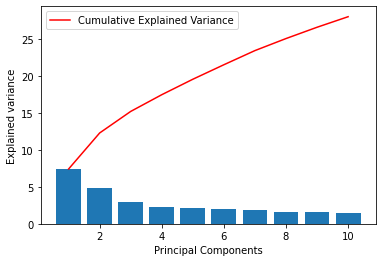

In [18]:
plt.bar(range(1, len(pca10.explained_variance_)+1), pca10.explained_variance_)
plt.ylabel("Explained variance")
plt.xlabel("Principal Components")
plt.plot(range(1, len(pca10.explained_variance_)+1),
         np.cumsum(pca10.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc="upper left")

**Scree Plot**

Text(0, 0.5, 'cumulative explained variance / eigenvalue')

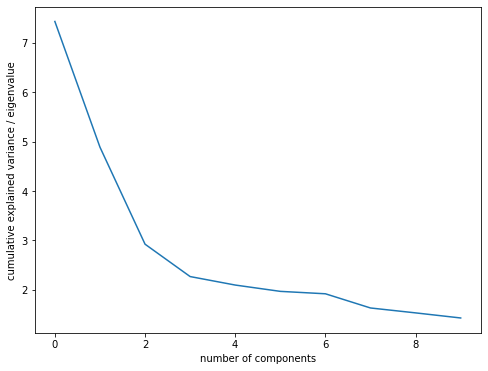

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(pca10.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance / eigenvalue')
# actually we can use until the 7th PCs(Principal Components)

Text(0, 0.5, 'PC2')

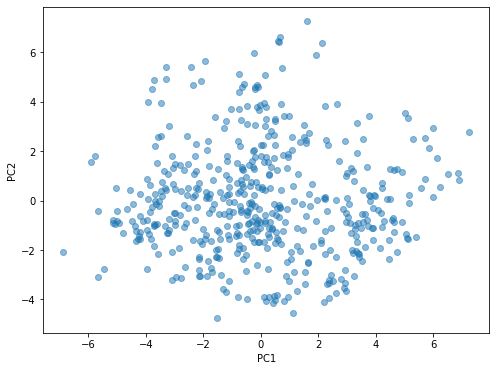

In [20]:
# Scattering first and the second principal component
plt.figure(figsize=(8, 6))
plt.scatter(pcm10[:, 0], pcm10[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [21]:
# pca10.components_

In [22]:
pca10.n_components_

10

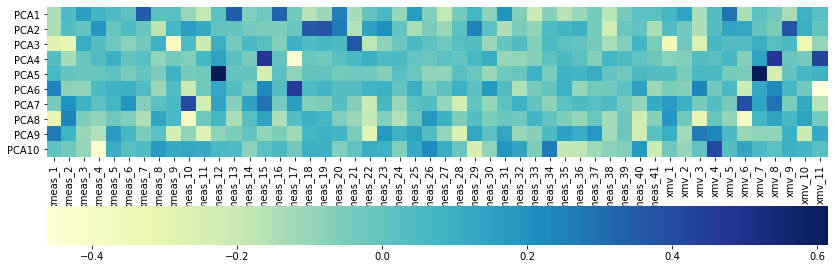

In [23]:
plt.figure(figsize=(14,6))
ax = sns.heatmap(pca10.components_,
                 cmap='YlGnBu',
                 yticklabels=["PCA" + str(x) for x in range(1, pca10.n_components_ + 1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"}
                )
ax.set_aspect("equal")

In [24]:
# PCA Biplot
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(8, 6), dpi=80)
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
## Biplot is actually a plot who has contain two plot which is,
# 1.Scatter plot of PC1 and PC2 or the other name is Score Plot
# 2.Loading plot which show how strong each caracteristic influences a principal component

## Scatter plot
# - the Scatter plot show that PCs describe variation and account for the varied influences
#   of the original characteristics. 

## Loading plot
# - the angels between the vectors tell us how characteristics correlated with one another
# - when two vectors are close, forming a small angle, the two variables they represent are 
#   positively correlated like, B and RM
# - when they forming an 90°, they don't have any correlation like, DIS and CRIM
# - when they diverge and form a large angle (close to 180°), they are negative corellated 
#   like,DIS and AGE

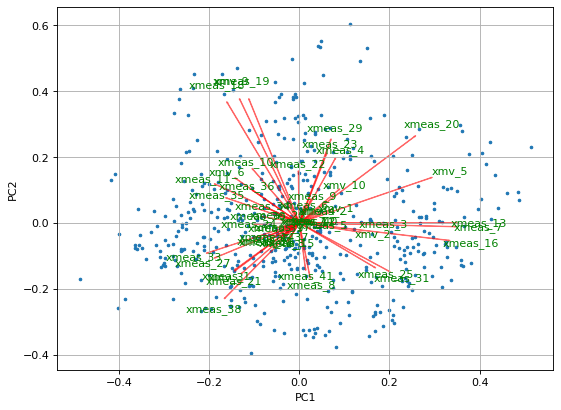

In [25]:
myplot(pcm10[:,0:2],np.transpose(pca10.components_[0:2, :]),list(x.columns))

## put the pca transform to dataframe

In [35]:
df_pcat = pd.DataFrame(pcm10)

In [37]:
# renaming the columns with string
df_pcat.columns = ['1','2','3','4','5','6','7','8','9','10']

In [38]:
df_pcat.head()

,1,2,3,4,5,6,7,8,9,10
0,0.388950,-1.162260,0.178439,0.917668,1.574408,0.062533,1.117883,0.512436,0.248689,0.859138
1,0.659900,-0.257637,-0.569804,-1.632406,0.538897,0.086923,-0.299071,-0.570140,-0.958438,-1.291828
2,0.551438,-0.304984,-1.048235,1.510136,0.984873,-2.267617,-0.340559,-0.301428,-0.911250,-1.053589
3,0.645543,-0.163624,-0.836992,0.267507,0.009231,-0.789105,-0.016942,0.059302,-1.544038,-1.689619
4,1.065974,-2.093557,-0.900601,0.755637,1.351310,1.618266,1.211616,1.044095,1.425800,-0.456060


In [28]:
df_pcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
0    500 non-null float64
1    500 non-null float64
2    500 non-null float64
3    500 non-null float64
4    500 non-null float64
5    500 non-null float64
6    500 non-null float64
7    500 non-null float64
8    500 non-null float64
9    500 non-null float64
dtypes: float64(10)
memory usage: 39.1 KB


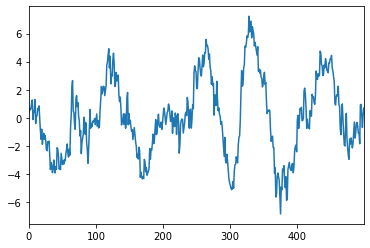

In [39]:
df_pcat['1'].plot()

C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_to

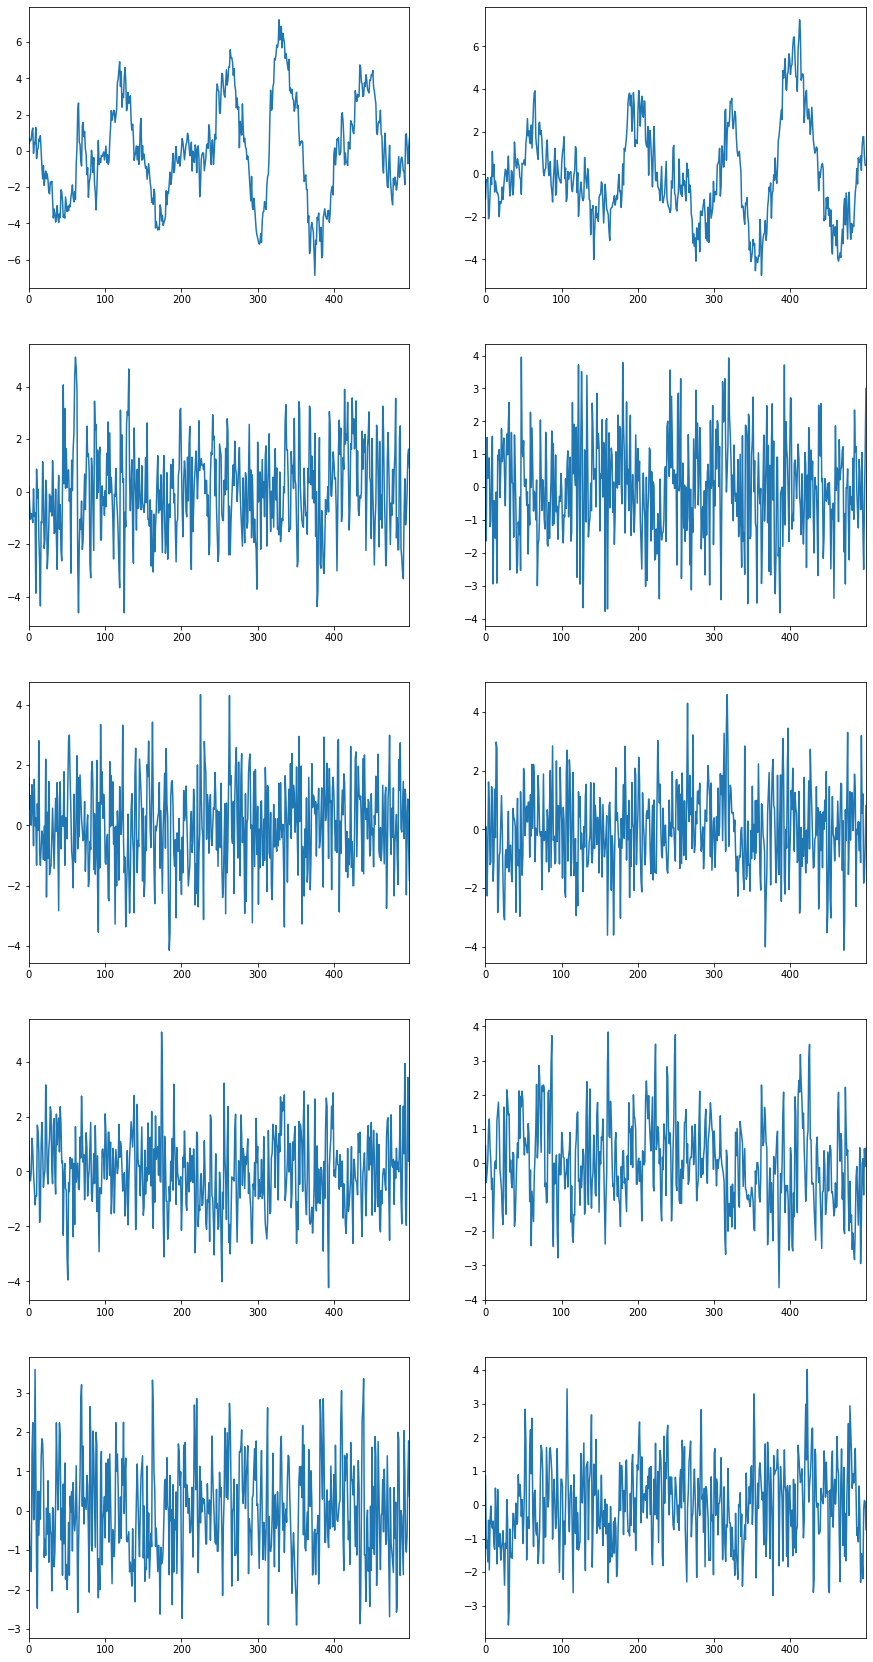

In [44]:
fig, ax = plt.subplots(5,2,figsize=(15,30))

for i in range(df_pcat.shape[1]):
    x = df_pcat.iloc[:,i]
    x.plot(ax=ax.ravel()[i]) 
    ax = ax.flatten()
#     ax[i].set_title(col_names[i])

C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\m477a\Anaconda3\envs\tf1\lib\site-packages\pandas\plotting\_to

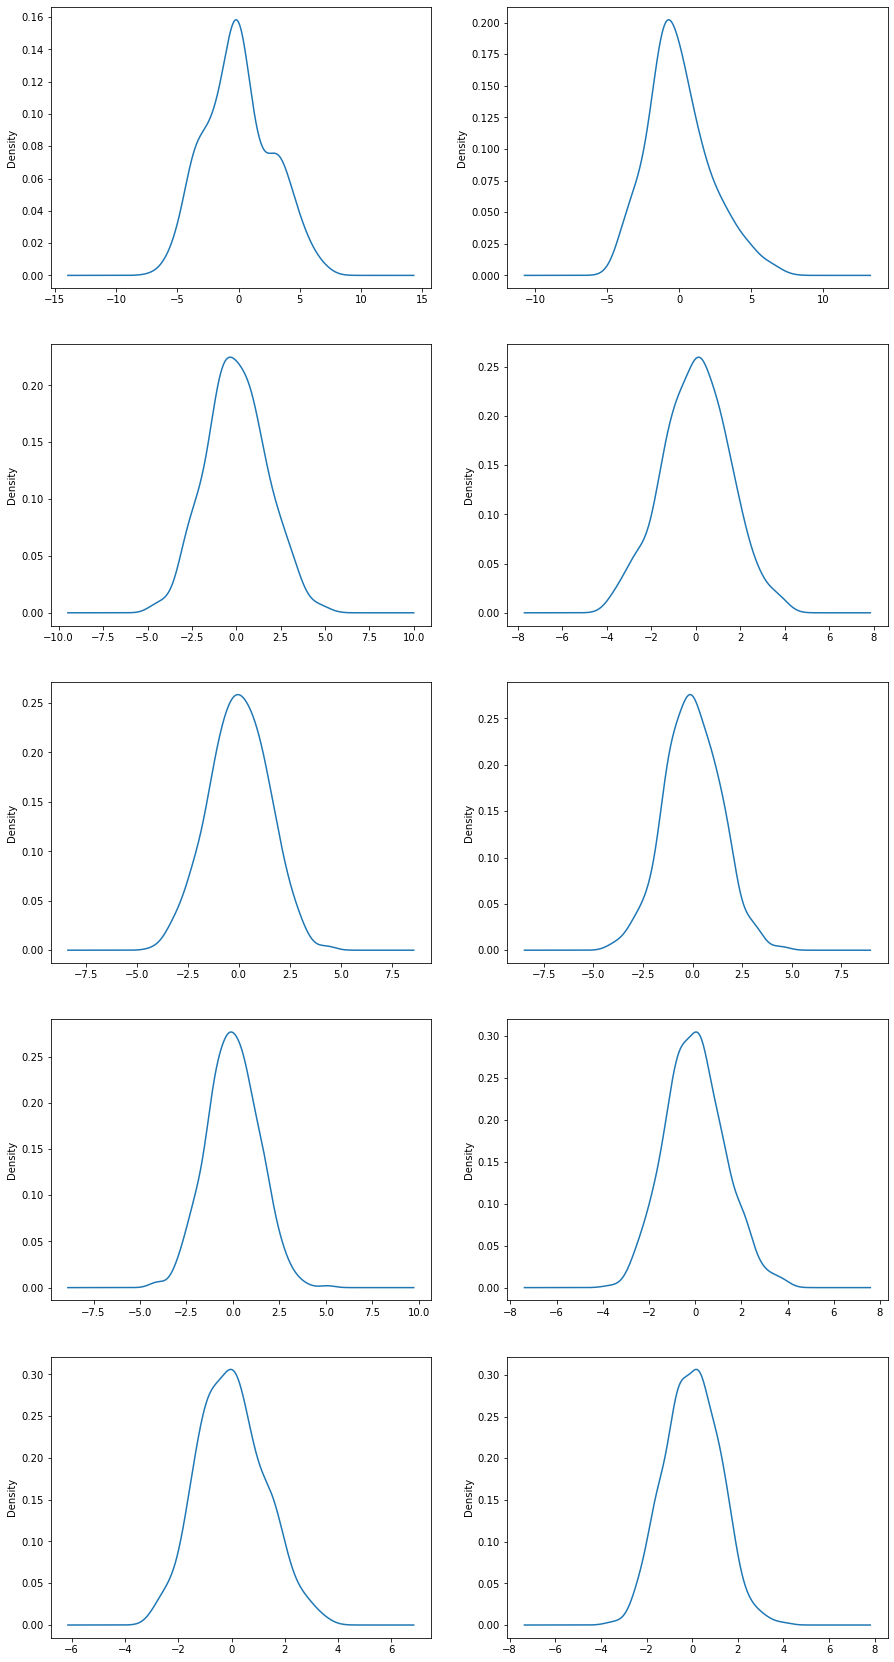

In [52]:
fig, ax = plt.subplots(5,2,figsize=(15,30))

for i in range(df_pcat.shape[1]):
    x = df_pcat.iloc[:,i]
    x.plot.kde(ax=ax.ravel()[i])
    ax = ax.flatten()
#     ax[i].set_title(col_names[i])

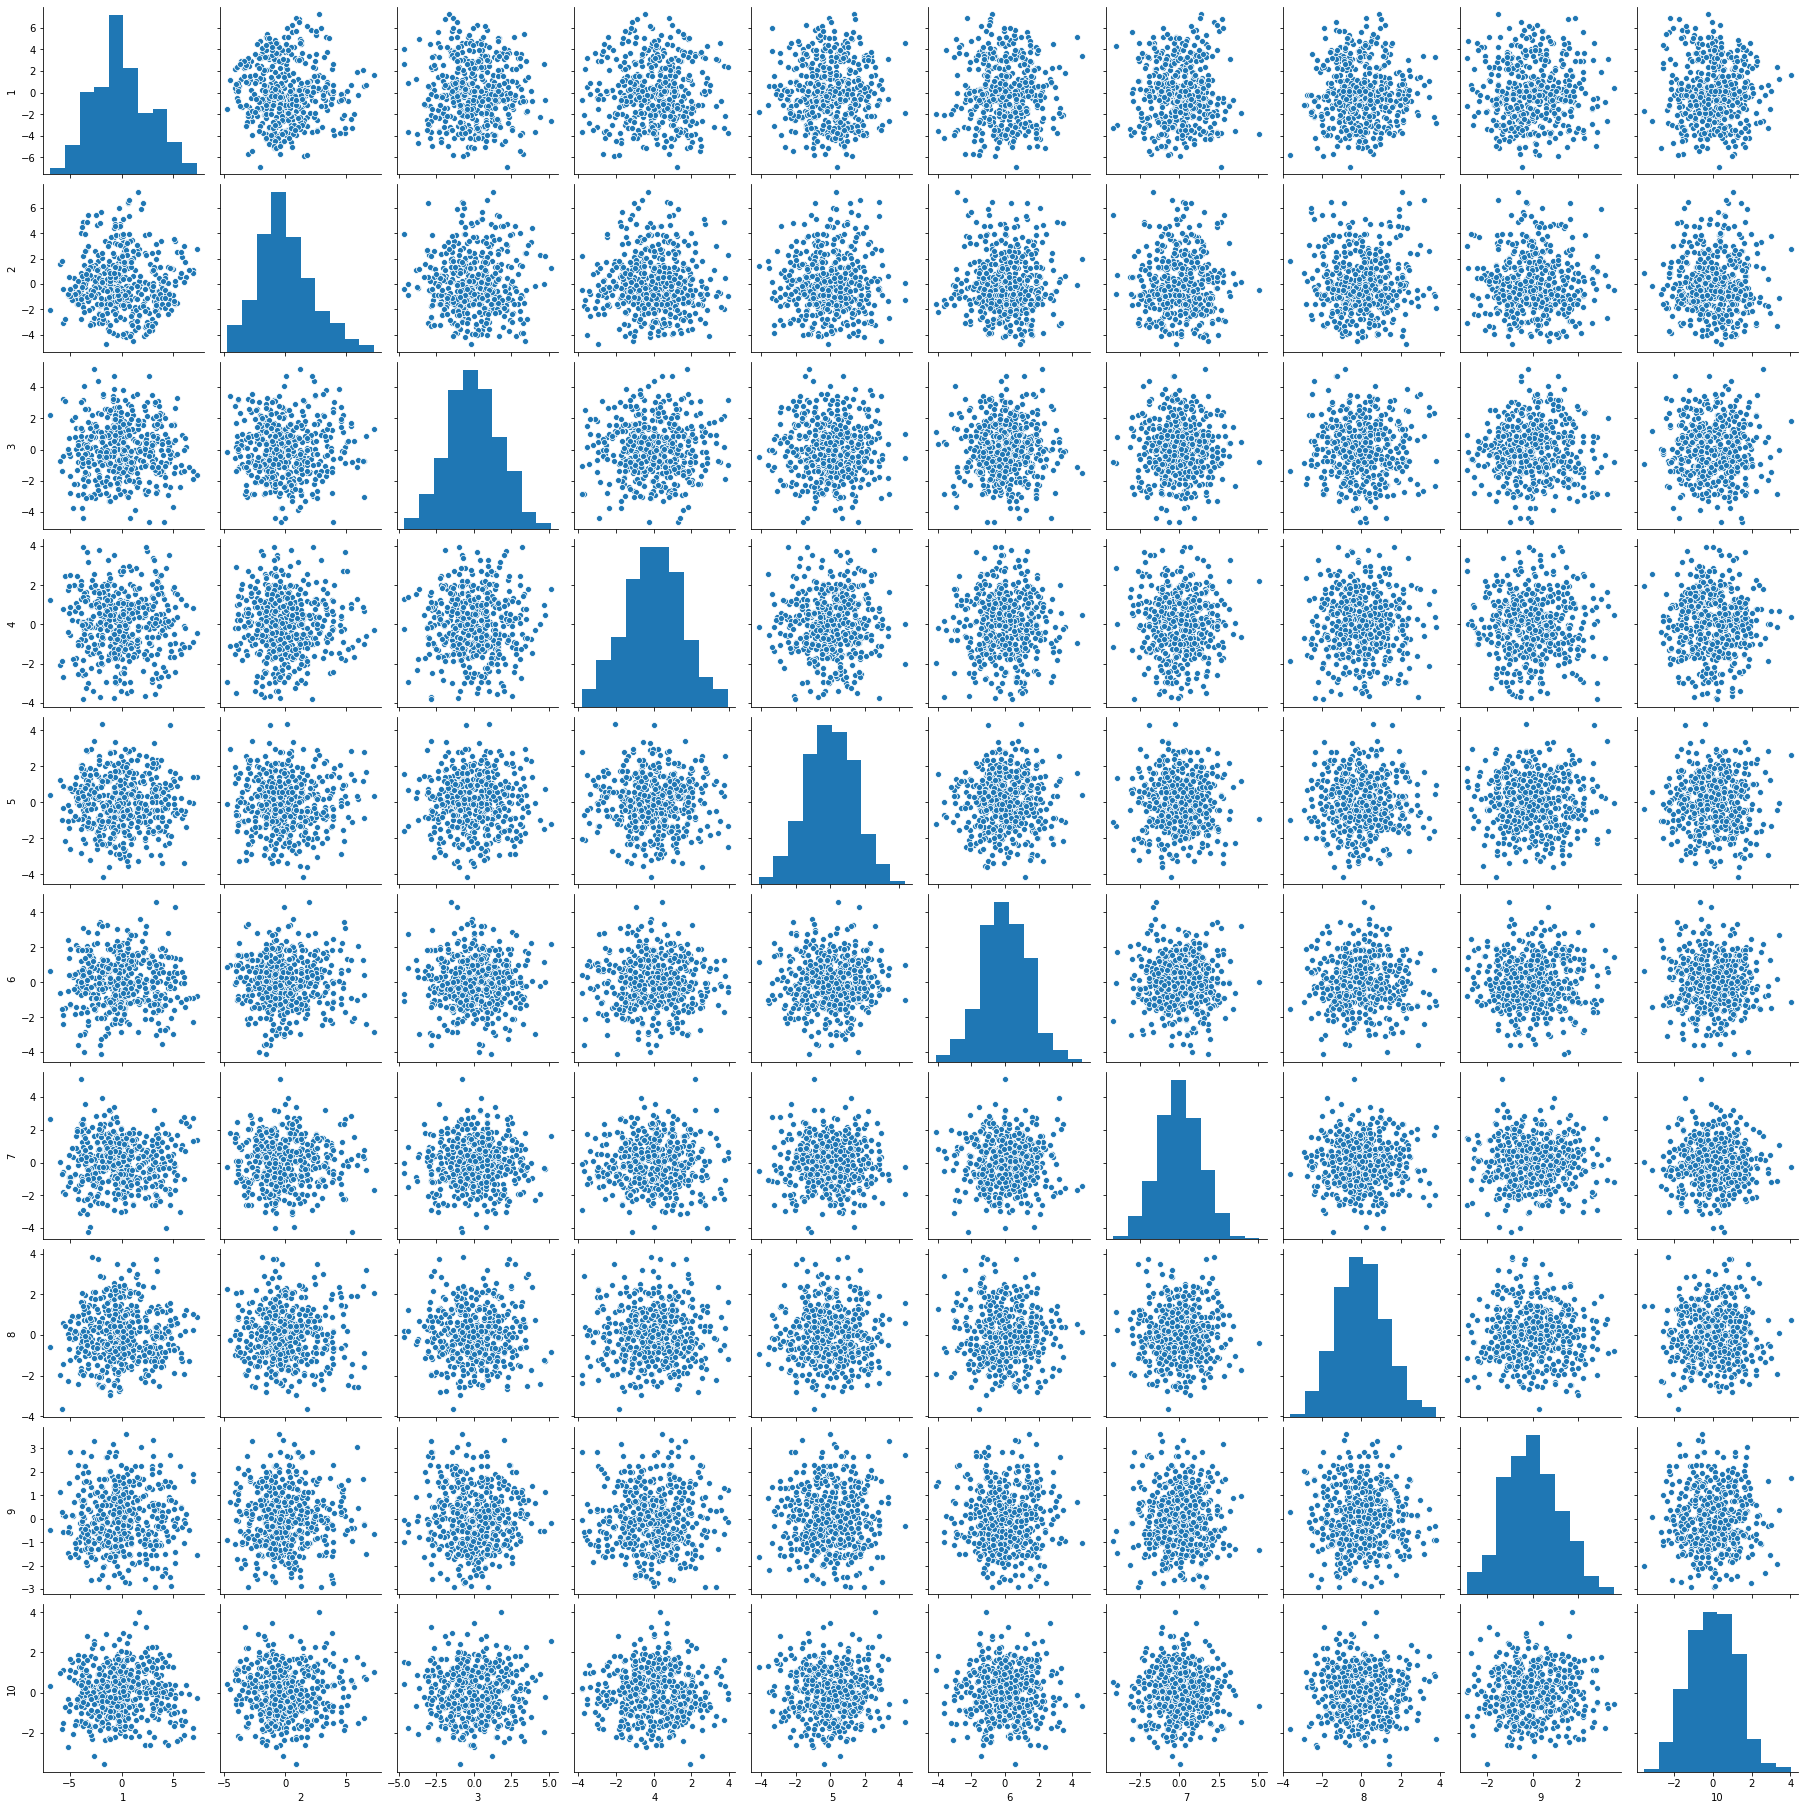

In [53]:
sns.pairplot(df_pcat)
# the data become to no corelation each other
# i think this is the prove of why PCA can solve a
# multicolinearity problem

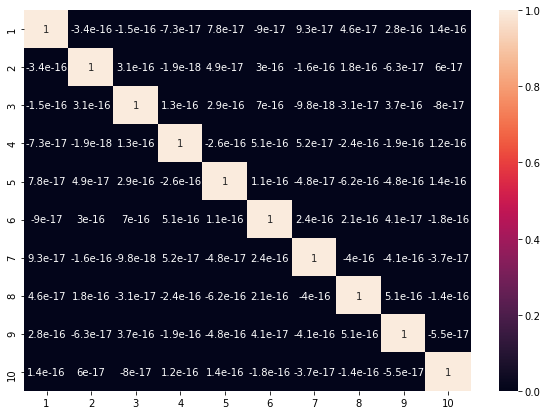

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pcat.corr(), annot=True)